# Surveying
-----------
What good is a measurement if you don't know where it was taken?

In [2]:
%%HTML
<link rel="stylesheet" href="../custom.css"/>  

In [3]:
import numpy as np
from resources.fig_02 import draw_tri_figure, draw_smiley
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 250

## Today:

* More on GPS and positioning
* Relative vs. Absolute
* Precision vs Accuracy

# Coordinate Systems
------
How do we describe where we are?

## Locating position on a globe?
<div class="row">

<div class="column">

Latitude and Longitude:
* Units? (Degrees minutes seconds)
* Latitude $\phi$: Positive North of Equator
* Longitude $\gamma$: Positive East of the Prime Meridian
* Not all that useful for “small” surveys (aka not global scale).
    * How far is a “second”?
</div>
<div class="column">

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/83/Latitude_and_longitude_graticule_on_a_sphere.svg/330px-Latitude_and_longitude_graticule_on_a_sphere.svg.png)
</div>

</div>


* 1 second length depends on what your latitude is!
    * at the Equator is ~30m
    * at 30$\degree$ ~27m
    * at 60$\degree$ ~15m
    * at 90$\degree$ = 0m

## Universe Transverse Mercator (UTM)

* Units: Meters
* Zones:
    * Split up into 6 degrees of longitude chunks.
    * Separated by Northern and Southern hemisphere.
* Northing: Meters north of:
    * In northern hemisphere, represent meters north of the equator.
    * In southern hemisphere, the equator is set at 10,000,000 m
* Easting: Meters east (-500,000) of central meridian (per zone).


## UTM Zones
They are numbered west to east with a North and a South for each number:

![UTM](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8d/Utm-zones-USA.svg/1280px-Utm-zones-USA.svg.png)

## As a grid
Sometimes each zone is further broken up by letter (C-X)

![UTM Grid](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Universal_Transverse_Mercator_zones.svg/1920px-Universal_Transverse_Mercator_zones.svg.png)

## Elevation & Altitude
Measured from a reference ellipsoid
* What’s a reference ellipsoid?
    * Sea level? (what is sea level 1000 miles inland?)
    * Basically they’re pre-defined ellipsoids centered on the earth’s center.
* Commonly WGS84


# How do we measure where we are?
-------------------


## GNSS
* Global Network Satellite System
* Used for finding where you are in a 4D world
* 4 core constellations
    * GPS - US system
    * GLONASS - Russian
    * BeiDou - China
    * Galileo - EU
* Many other regional and smaller scale constellations

## How does it work?
* Satellites constantly send signals about their own location, and a reference time for when the signal was sent.
* Receiver measures time the signal took to arrive relative to its own time
* Measures distance to satellite based on distance = velocity * time
* Finds itself in spacetime!
    * Think of Trilateration.


In [4]:
centers = np.array([
    [350., 650.],
    [600., 400.],
    [650., 800.]
])

radii = np.array([200., 300., 150.])
angles = np.r_[5*np.pi/4, np.pi/4, 3 * np.pi/4]

## Trilateration (not triangulation)

Trilateration:
* use of distances (>=3) from known locations to determine an unknown position

Triangulation:
* Make a triangle between two known locations and one unknown:
* Measure angles of the triangle

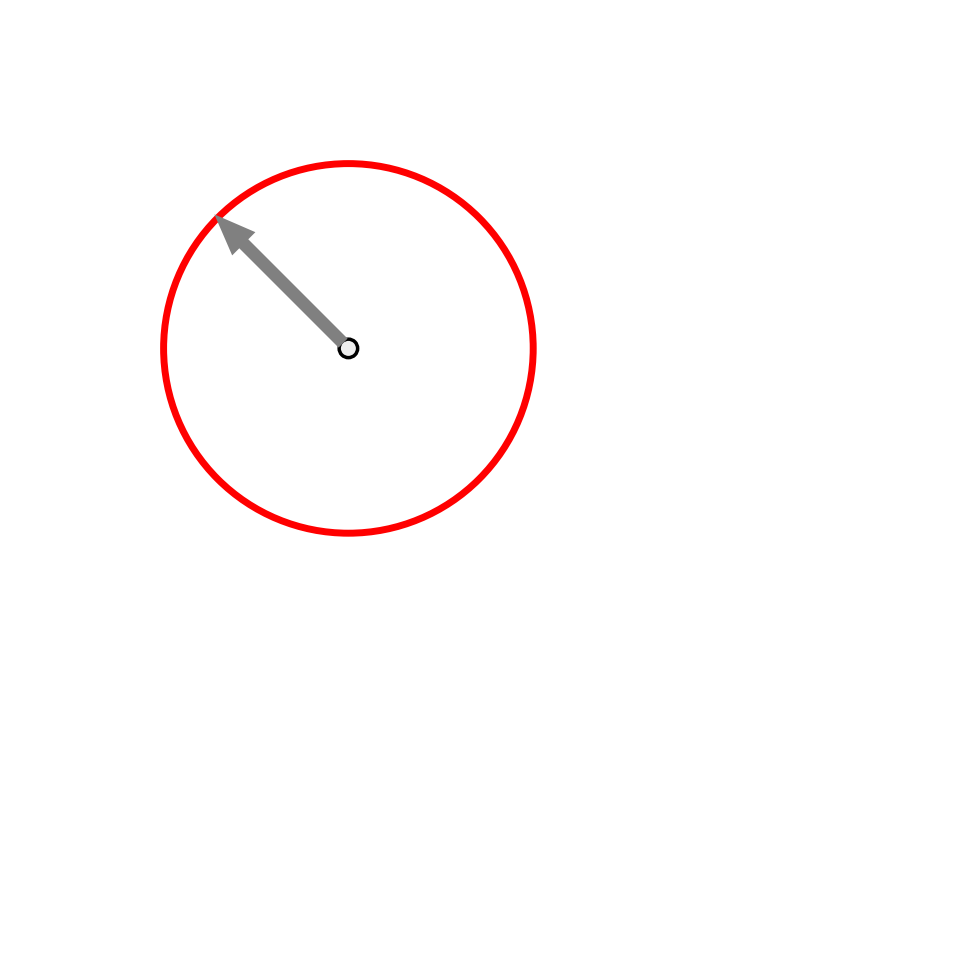

In [5]:
i=1; draw_tri_figure(centers[:i], radii[:i], angles[:i]);

With a known distance from a fixed point, you could theoretically exists anywhere on a spherical shell at the same distance

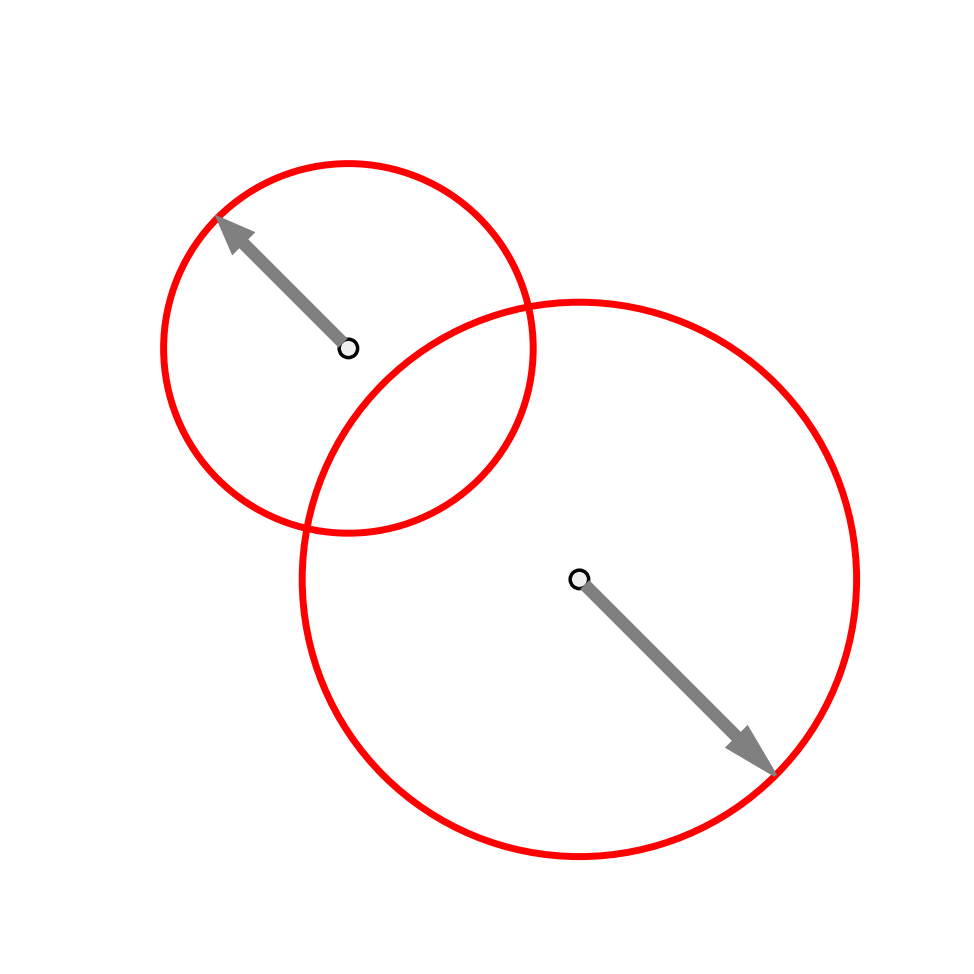

In [6]:
i=2; draw_tri_figure(centers[:i], radii[:i], angles[:i]);

Intersection of two shells yields a circle of potential locations

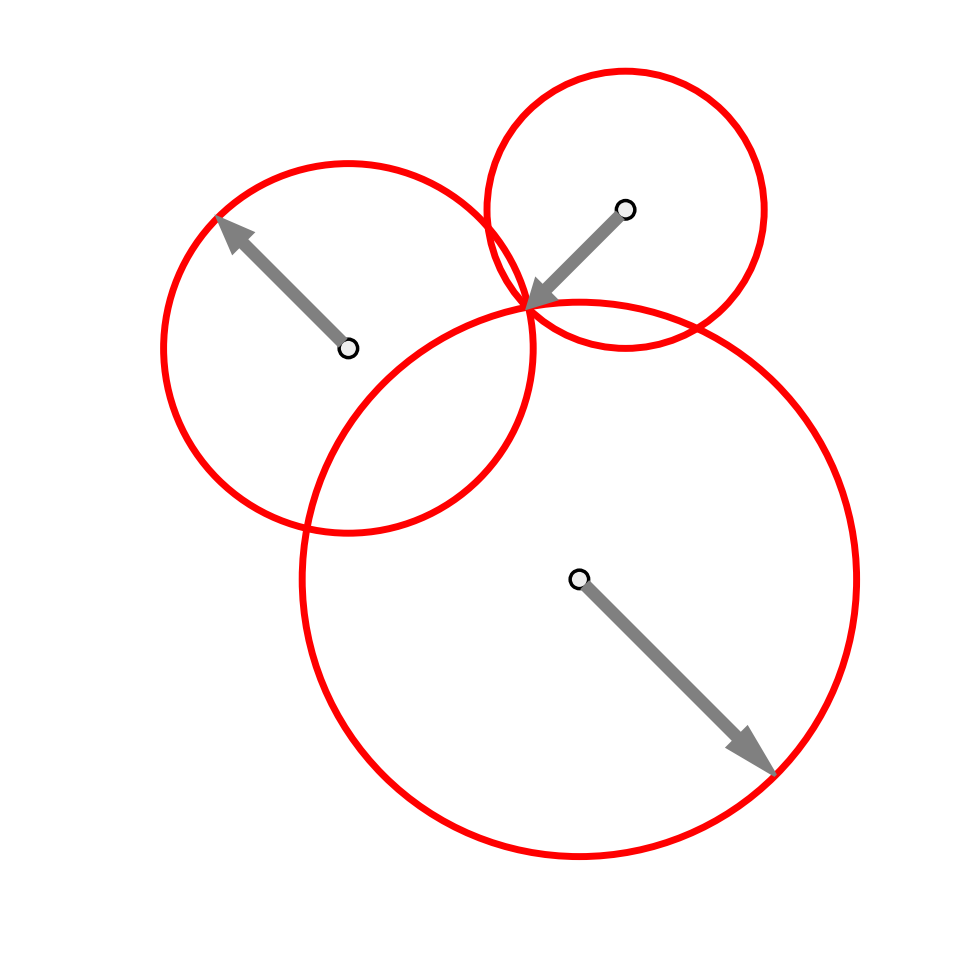

In [7]:
i=3; draw_tri_figure(centers[:i], radii[:i], angles[:i]);

Third location narrows down to a single point of intersection

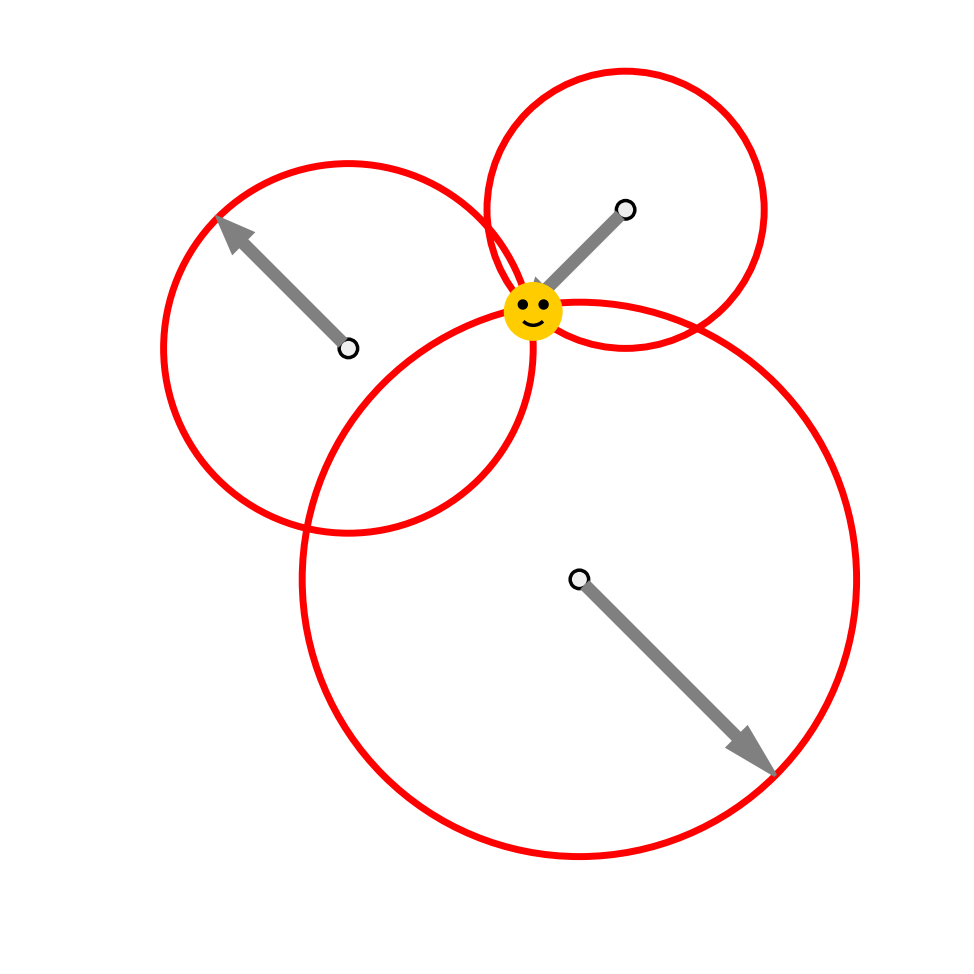

In [8]:
ax = draw_tri_figure(centers[:i], radii[:i], angles[:i]); draw_smiley(np.r_[550, 690], 30, ax=ax);

Success!

## Triangulation
![triang](https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Mountain_height_by_triangulation.svg/1920px-Mountain_height_by_triangulation.svg.png)

![boat](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Triangulation.svg/800px-Triangulation.svg.png)

# Fundamentals of measurements
-----------
A couple of thought experiments here:

Q: What does a ruler measure?

Q: What if the ruler is broken before the 1" mark?

Q: Think, you are given a meter stick, how would you measure a distance *greater* than 1 meter?

Q: Is it a relative or an absolute measurement?

Come up with a few more examples!

| Relative | Absolute|
|----------|---------|
|          |         |
|   |   |

## Relative vs. Absolute

Relative Measure:
* A quantity that only makes senses as a comparison between two or more objects.
* Depends on a reference point!

Most devices only measure relative information
* GPS: Position relative to ...
* Accelerometer: Acceleration relative to ...
...

Absolute Measure:
* Usually measures of quantity, can only be positive

Examples:
* Size of sets: "I have four apples", "This array has 20 double precision floating point numbers"
* Mass
* Temperature (Kelvin)

Some things can be both depending on the measuring device:
* Pressure:
    * Absolute if from vacuum,
    * Relative if a gauge pressure (i.e. tire pressure).

## Errors in measurments: Precision vs. Accuracy
Think all the way back to junior high science class...

Which targets are more precise? Which are more accurate?

![Precision and Accuracy](resources/prec_accuracy.png)

Precision: How repeatible a measurement is!

Accuracy: How correct a measrurement is!

What more Statistical terms might we use to describe them?
* Precision $\leftrightarrow$ standard deviation, variance
* Accuracy $\leftrightarrow$ bias

**Q**: If we have a very precise measurement device, but it has a large bias can it still be useful?

# GNSS
## Sources of error?

## GNSS Errors:
What are some errors in determining distance using light?
* Differences in time (atomic clock drift on the order of 1E-10 second per day)
     * Relativity!
* Changes in satellite location (Ephemeris errors)
* Ionosphere conditions


All together, an accuracy of about 5-10 meters
* Some applications this is fine
* Most others need more precision!

## Differential GPS (DGPS)

Most of these errors change slowly spatially
* If we place a station at a fixed or known point, we can correct for these errors
* Gets us down to about a few cm accuracy

Actually started because the US deliberately introduced errors (~100m) into it’s GPS broadcast system as a defense measure,

Then civilian users realized they could correct for these errors using a known base.

~2000 They gave up and stopped adding the errors


# What if you can't see satellites?
(or cm scale precision isn't good enough)

## Total Stations
Precise instrument to measure angles and sight-line distances between two points
* Measures distance using a laser and a corner reflector
* Millimeter accuracy

How do you process this data?

Think polar coordinates
* Trigonometry
* Triangulation

### Vertical Positioning
![Vertical](resources/total_elevation.png)

### Horizontal positioning
![total horizontal](resources/total_horizontal.png)

### Free stationing (resection)
Using two known points, distances, and angles to them, find the location of the third point
* Used to extend surveys!
![free](resources/total_free_station.png)

## Sources of error in total station measurements?
* Movement of post
* Variations in air temperature/pressure
* Blocks for line-of-sight between laser emitter and reflector